## [2021융합빅데이터]

### 추가 분석 : LogisticRegression

  * 피마 인디언 당뇨병 데이터 세트
    * 데이터 세트는 여러 의료 예측 변수와 하나의 대상 변수인 결과 변수로 구성된다. 
    * 예측 변수에는 환자의 임신 횟수, BMI, 인슐린 수준, 나이 등이 포함된다.
    
 <img src="dataset.png " width="500"/>

In [85]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import seaborn as sns

df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<AxesSubplot:>

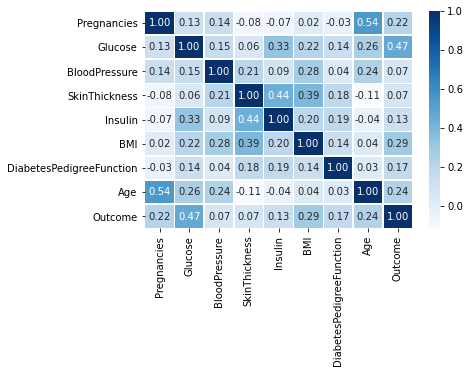

In [86]:
# 상관관계 분석 (시각화)
sns.heatmap(data=df.corr(),annot=True, fmt='.2f',linewidths=.5,cmap='Blues')

In [87]:
# 데이터 중에 0값이 있으면 안되는 feature들에 0값이 있음을 확인
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [88]:
# 각 feature마다 0값이 몇 개 인지 확인
zero_features = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

for feature in zero_features:
    zero_count = df[df[feature]==0][feature].count()
    print(feature, zero_count)

Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11


In [89]:
# 0 값을 평균값으로 대체
mean_zero_features = df[zero_features].mean()
df[zero_features] = df[zero_features].replace(0,mean_zero_features)

In [90]:
data = df.iloc[:,:-1]
target = df.iloc[:,-1]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [91]:
X_train,X_test,y_train,y_test = train_test_split(data_scaled,target,test_size=0.3,random_state=11)

In [92]:
model3 = LogisticRegression()
model3.fit(X_train,y_train)
print(model3.score(X_test,y_test))

0.7792207792207793


In [93]:
logit = sm.Logit(y_train,X_train)
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.540425
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  537
Model:                          Logit   Df Residuals:                      529
Method:                           MLE   Df Model:                            7
Date:                Thu, 09 Dec 2021   Pseudo R-squ.:                  0.1624
Time:                        12:52:26   Log-Likelihood:                -290.21
converged:                       True   LL-Null:                       -346.46
Covariance Type:            nonrobust   LLR p-value:                 2.786e-21
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3394      0.128      2.651      0.008       0.088       0.590
x2             1.0623      0.136      7.800      0.000       0.795       1.329
x3            -0.1266      0.117     -1.086      0.278      -0.355       0.102
x4            -0.0794      0.124     -0.643      0.520      -0.322       0.163
x5            -0.0878      0.126     -0.696      0.487      -0.335       0.159
x6             0.5568      0.132      4.222      0.000       0.298       0.815
x7             0.2177      0.113      1.921      0.055      -0.004       0.440
x8             0.0815      0.132      0.617      0.537      -0.178       0.341
==============================================================================
"""